# Project: Predicting clients who are leaving BetaBank

This project is the final part of the 'Supervised Learning' sprint at the TripleTen Data Science Bootcamp. The objective is to create a classification model that predicts clients who are leaving BetaBank, using information about clients who have already left and clients who remain in the bank. This includes features such as their credit score, gender, the number of products they possess in the bank, among other details. The model is required to achieve an F1 score higher than 59% for the test dataset.

## Creating and exploring the dataset

In [1]:
# Libraries and models to be used in the project

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Creating a dataframe with the dataset

df = pd.read_csv('/datasets/Churn.csv')

# Printing the first 10 rows

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
# Displaying information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Checking for duplicated rows

df.duplicated().sum()

0

There are no duplicated rows, and the data types seem correct. However, there are missing values in the 'tenure' column. Let's analyze this specific data.

In [5]:
# Describing numeric values

df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

<AxesSubplot:ylabel='Frequency'>

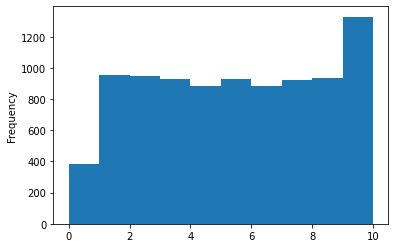

In [6]:
# Creating a histogram with Tenure data

df['Tenure'].plot(kind = 'hist', bins = 10)

In [7]:
# Looking for correlations in the numeric values of the dataset

df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Given that the 'Tenure' column has values evenly distributed between 1 and 9, and the mean is almost the same as the median, without a strong correlation between this column and any other, filling these rows with the median of the values in the dataset seems like a reasonable choice.

In [8]:
# Filling the missing values with the median

df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

# Checking if the missing values were successfully filled

df['Tenure'].isna().sum()

0

With the 'Tenure' column problem solved, one last good action is to observe the values in each column in the dataset, looking for inconsistencies or impossible values.

In [9]:
# Describing numeric values for all columns

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The values look consistent. Nevertheless, we will explore some information to gain a better understanding of the dataset.

In [10]:
# Checking the number of unique values in each column.

for column in df.columns:
    print(f'{column}: {df[column].unique().size}')

RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


As expected, in some numeric columns, there are a lot of unique values, as seen in 'Balance' and 'EstimatedSalary'. 'Surname' also has a higher number of unique values, which makes sense, as we have clients from different families in the dataset. Additionally, the two qualitative pieces of information that can be more interesting for training our model (Geography and Gender) have only 3 and 2 unique values, respectively. This is advantageous as we can treat this data in a numeric way in the subsequent models.

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.pivot_table(columns = 'Gender', values = 'Exited', aggfunc = 'mean')

Gender,Female,Male
Exited,0.250715,0.164559


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.pivot_table(columns = 'Geography', values = 'Exited', aggfunc = 'mean')

Geography,France,Germany,Spain
Exited,0.161548,0.324432,0.166734


The information about gender and geography shows us that the clients in the dataset are almost evenly distributed by gender, but almost 50% of the clients live in France. Connecting this data with the 'Exited' column, we can observe a higher rate of female clients and clients living in Germany leaving the bank.

In [15]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006979,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.020331,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006979,-0.020331,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Looking into correlations in the dataset, it's possible to observe a considerable correlation between 'Age' and 'Exited', as well as 'NumOfProducts' and 'Balance'. Starting by looking into the second correlation, we can observe the values for the 4 possible options for 'NumOfProducts', ranging from 1 to 4.

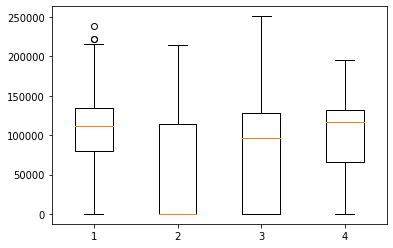

In [16]:
balance_1 = df[df['NumOfProducts'] == 1]['Balance']

balance_2 = df[df['NumOfProducts'] == 2]['Balance']

balance_3 = df[df['NumOfProducts'] == 3]['Balance']

balance_4 = df[df['NumOfProducts'] == 4]['Balance']

plt.boxplot([balance_1, balance_2, balance_3, balance_4])
plt.show()

A similarity between the balance for clients who have 1 or 4 products can be noticed, as well as the balance for clients who have 2 or 3 products in the bank. However, for any number of products, the third quartile is close to 150,000. One last thing that deserves attention is the median value for the balance for people who have 2 products, indicating that at least 50% of the clients with this number of products don't have any value in this bank account.

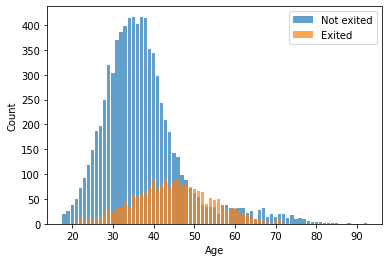

In [17]:
exited_age = df[df['Exited'] == 1].groupby('Age')['Exited'].count()

not_exited_age = df[df['Exited'] == 0].groupby('Age')['Exited'].count()

plt.bar(not_exited_age.index, not_exited_age.values, label='Not exited', alpha=0.7)

plt.bar(exited_age.index, exited_age.values, label='Exited', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

There is a concentration of clients aged between 25 and 45 years old, and the number of clients leaving starts to increase significantly from 30 to 40 years old. It's possible to have some hypotheses about this—perhaps the bank is more successful with younger clients, or maybe these clients just haven't had as many years in the bank to start thinking about leaving. We could investigate this more deeply, but it's not our goal here, so we will just consider it as a curiosity.

In [18]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<AxesSubplot:ylabel='Frequency'>

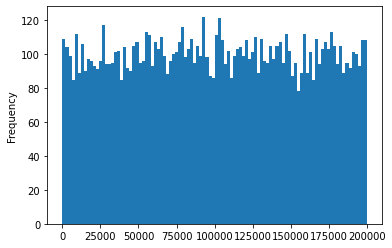

In [19]:
df['EstimatedSalary'].plot(kind = 'hist', bins = 100)

One last observation can be made about the estimated salary. The minimum value is 11.58, which is significantly low. If we plot the estimated salaries for all the clients, we see this histogram with values evenly distributed, which is not common for salaries. We will continue our machine learning project with this data. However, the method used for this estimation could be analyzed for improving predictions and, consequently, our models.

## Data preparation

In the dataset, we can find 3 categorical features: surname, geography, and gender. There are 2 options for gender and 3 options for geography, which leads us to use One-Hot encoding, given the few options for the values of each column. On the other hand, the 'Surname' column has 2932 unique values, and it's not practical to have almost three thousand columns in our dataset. Therefore, we will use One-Hot Encoding for geography and gender and exclude the surname from our machine learning project. It's not a problem to lose this data because the variability of the surname makes the feature less interesting for training. We will also exclude 'RowNumber' and 'CustomerId' as they are just additional indexers. We aim to retain only the features that genuinely influence the learning process of the algorithm.

In [20]:
# Using OHE for Gender and Geography

df_ohe = pd.get_dummies(df[['Gender', 'Geography']], drop_first = True)

# Creating a dataframe that includes the One-Hot Encoded columns and excludes unnecessary columns

df_plus_ohe = pd.concat([df, df_ohe], axis = 1).drop(['Surname', 'Gender', 'Geography', 'RowNumber', 'CustomerId'], axis = 1)

# Showing the first 10 rows of this dataframe

df_plus_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8.0,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2.0,134603.88,1,1,1,71725.73,0,1,0,0


In [21]:
# Displaying information about the dataset

df_plus_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


After these adjustments, it's necessary to split the dataframe into three parts for training, validation, and testing the models.

In [22]:
# Defining features and target

features = df_plus_ohe.drop('Exited', axis = 1)
target = df_plus_ohe['Exited']

# Splitting the dataframe into two parts, with 80% for training and 20% for testing.

features_train_test, features_valid, target_train_test, target_valid = train_test_split(features, target, test_size = 0.2, random_state = 12345)

# Spliting the training dataframe into two parts, with 60% of the original dataframe for training and 20% for testing.

features_train, features_test, target_train, target_test = train_test_split(features_train_test, target_train_test, test_size = 0.2/0.8, random_state = 12345)

# Checking the shape of the split data

print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_test.shape)
print(target_valid.shape)

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


We also have a scaling issue, as some elements vary from 0 to 1 while others can be higher than 100,000, as observed in the 'Balance' and 'EstimatedSalary' columns. This can be addressed by using StandardScaler for the columns that have non-binary values.

In [23]:
# Training StandardScaler with the numeric values and replacing the original dataframe with the scaled values.

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# Showing the first 10 rows of this dataframe

features_train.head(10)

/tmp/ipykernel_127/404560678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_127/404560678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858,1,0,0
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006,1,1,0
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,0.816929,1,1,0.801922,0,0,0
2127,0.598296,-0.459816,1.439380,0.921963,0.816929,1,0,0.820416,1,1,0
2051,0.618925,-0.173505,-1.454209,0.482629,0.816929,0,0,1.208574,0,0,0
6712,-0.546636,0.399118,-0.369113,-1.232442,-0.896909,1,0,1.225280,0,0,0
4994,1.485360,1.258053,-0.007415,1.450438,-0.896909,1,1,-0.645530,0,1,0
9523,0.082561,-0.650691,-1.815908,0.607589,-0.896909,1,0,-0.266350,0,0,0


## Training and validating some models on an unbalanced dataset

To initiate the modeling training, we will not consider any need for balancing the number of positive and negative answers in the dataset. This approach will allow us to compare the results. We will use Logistic Regression, Decision Tree Classifier, and RandomForest Classifier as model options in this task.

In [24]:
# Using Logistic Regression to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

lr = LogisticRegression(solver = 'liblinear', random_state = 12345)

lr.fit(features_train, target_train)

predicted_valid_lr = lr.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_lr)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_lr)}')

f1_score = 0.3006993006993007, roc_auc_score = 0.5819486028129843


In [25]:
# Using Decision Tree Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

best_depth = 0
best_score = 0

for i in range(1, 21):
    
    dt = DecisionTreeClassifier(random_state = 12345, max_depth = i)
    dt.fit(features_train, target_train)
    predicted_valid_dt = dt.predict(features_valid)
    score = f1_score(target_valid, predicted_valid_dt)
    if score > best_score:
        best_score = score
        best_depth = i        
        
print(f'Best result: f1_score = {best_score}, max_depth = {best_depth}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_dt)}')

Best result: f1_score = 0.5608011444921316, max_depth = 5, roc_auc_score = 0.6843529049192238


In [26]:
# Using Random Forest Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

best_n_estimator = 0
best_score = 0

for i in range(1, 100, 10):
    
    rf = RandomForestClassifier(random_state = 12345, n_estimators = i)
    rf.fit(features_train, target_train)
    predicted_valid_rf = rf.predict(features_valid)
    score = f1_score(target_valid, predicted_valid_rf)

    if score > best_score:
        best_score = score
        best_n_estimator = i

print(f'Best result: f1_score = {best_score}, best_n_estimator = {best_n_estimator}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_rf)}')

Best result: f1_score = 0.5784883720930233, best_n_estimator = 91, roc_auc_score = 0.7133135121212618


The best result for the F1 score was achieved by the Random Forest Classifier model, using 91 as the value for the n_estimators parameter. It's notable that the ROC AUC score is significantly higher in all models. For the next models, we will consider the best results for max_depth and n_estimators for the Decision Tree Classifier and the Random Forest Classifier, respectively.

## Training and validating some models using balanced class weights

In this section, the training models from the previous section will be repeated, using the best-tested value for some parameters and choosing the option 'balanced' for the class_weight parameter. With this approach, we aim to improve the results for the F1 score by balancing the weight of positive and negative answers, considering the class distribution in the dataset.

In [27]:
# Using Logistic Regression to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

lr = LogisticRegression(solver = 'liblinear', random_state = 12345, class_weight = 'balanced')

lr.fit(features_train, target_train)

predicted_valid_lr = lr.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_lr)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_lr)}')

f1_score = 0.5029337803855826, roc_auc_score = 0.7031634535360317


In [28]:
# Using Decision Tree Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

dt = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced', max_depth = best_depth)

dt.fit(features_train, target_train)

predicted_valid_dt = dt.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_dt)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_dt)}')

f1_score = 0.5874769797421732, roc_auc_score = 0.7654625553284271


In [29]:
# Using Random Forest Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

rf = RandomForestClassifier(random_state = 12345, class_weight = 'balanced', n_estimators = best_n_estimator)

rf.fit(features_train, target_train)

predicted_valid_rf = rf.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_rf)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_rf)}')

f1_score = 0.5595238095238095, roc_auc_score = 0.7020222698315098


We achieved higher values for F1 score and ROC AUC score in the Logistic Regression and Decision Tree Classifier models. However, none of the tests led us to an F1 score higher than 59%, which is our goal in this project.

## Training and validating some models using upsampling

Another option, aside from balancing the class weight, is to use the upsampling technique in an attempt to achieve better results for F1 score. This is useful when there is an unbalanced proportion of positive and negative answers in the dataset.

In [30]:
# Checking the proportion of positive answers in the target

df[df['Exited'] == 1]['Exited'].size/df['Exited'].size

0.2037

We can duplicate some of the rows with positive answers to help train our model, emphasizing information about the clients who left the bank. Specifically, by observing the proportion, if we add 4 times each row with a positive answer to the dataset, it will have something close to a 50% balance between negative and positive answers.

In [31]:
# Creating a function to upsample features and target dataset

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + repeat * [features_ones])
    target_upsampled = pd.concat([target_zeros] + repeat * [target_ones])
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# Upsampling

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# Checking the proportion of positive and negative answers after the upsampling

target_upsampled.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

Finally, we can train our models again, using the upsampled data.

In [32]:
# Using Logistic Regression to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

lr = LogisticRegression(solver = 'liblinear', random_state = 12345)

lr.fit(features_upsampled, target_upsampled)

predicted_valid_lr = lr.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_lr)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_lr)}')

f1_score = 0.504983388704319, roc_auc_score = 0.7056222466058532


In [33]:
# Using Decision Tree Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

dt = DecisionTreeClassifier(random_state = 12345, max_depth = best_depth)

dt.fit(features_upsampled, target_upsampled)

predicted_valid_dt = dt.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_dt)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_dt)}')

f1_score = 0.5874769797421732, roc_auc_score = 0.7654625553284271


In [34]:
# Using Random Forest Classifier to predict values, considering F1 score and ROC AUC score as metrics to evaluate the model.

rf = RandomForestClassifier(random_state = 12345, n_estimators = best_n_estimator)

rf.fit(features_upsampled, target_upsampled)

predicted_valid_rf = rf.predict(features_valid)

print(f'f1_score = {f1_score(target_valid, predicted_valid_rf)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_rf)}')

f1_score = 0.6020671834625324, roc_auc_score = 0.7365972328714504


Using this technique, we achieved an F1 score higher than 59% with the Random Forest Classifier. The Decision Tree Classifier is also very interesting and has a ROC AUC score even higher than the Random Forest Classifier, but as we are using F1 score to choose our model, the best option seems to be the Random Forest.

## Testing the chosen model

After all these tests, we have chosen the model with the best result for F1 score, and now we can test it with the test dataset. However, to train this model in the best way possible, we can concatenate the validation and training datasets, providing more data to train our model, as the validation dataset will not be useful anymore.

In [35]:
# Concatenating the training and validation datasets

features_train_final = pd.concat([features_upsampled] + [features_valid])
target_train_final = pd.concat([target_upsampled] + [target_valid])

In [36]:
# Training the model with the concatenated dataset and testing with features_test and target_test

rf = RandomForestClassifier(random_state = 12345, n_estimators = best_n_estimator)

rf.fit(features_train_final, target_train_final)

predicted_valid_rf = rf.predict(features_test)

print(f'f1_score = {f1_score(target_test, predicted_valid_rf)}, roc_auc_score = {roc_auc_score(target_valid, predicted_valid_rf)}')

f1_score = 0.5949008498583569, roc_auc_score = 0.4981352477626695


The result has a lower ROC AUC score than the validation dataset; however, the F1 score remains higher than 59% for the test dataset. We could further improve this result by balancing the class weight using class_weight='balanced', but it's not necessary as we have already achieved the project's goal.